# **Classificação**

Objetivo: prever se um cliente tem um alto risco de crédito ou baixo risco. <br>
Premissa: cada linha é um cliente

In [ ]:
!wget -q 'https://raw.githubusercontent.com/DallastaDaniel/ML_especializacao/main/dados/fixacao/credit_risk.csv' -O 'credit_risk.csv'

`credit_risk.csv`: **dicionário de dados**

|          Feature |                    Description |
|-----------------:|-------------------------------:|
|      customer_id | customer id                    |
|      overdue_sum | total overdue days             |
|       pay_normal | number of times normal payment |
|     credit_limit | credit   limit                 |
|      new_balance | current balance                |
|  highest_balance | highest balance in history     |
| high_credit_risk | 1 if high credit risk, else 0  |

## Bibliotecas

In [ ]:
# Manipulação:
import numpy as np
import pandas as pd

# Visualização:
import matplotlib.pyplot as plt
import seaborn as sns

# Modelagem:
from sklearn.model_selection import train_test_split   # separação treino/teste
from sklearn.preprocessing import StandardScaler      # normalização
from sklearn.tree import DecisionTreeClassifier          # algoritmo de classificação (Árvore de Decisão)
# métricas de validação:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

## Coleta dos dados

In [ ]:
clientes = pd.read_csv('credit_risk.csv')
clientes.head()

,customer_id,overdue_sum,pay_normal,credit_limit,new_balance,highest_balance,high_credit_risk
0,58987402,0,1,16500.0,0.0,NaN,0
1,58987402,0,1,NaN,42000.0,35500.0,0
2,58987402,0,2,113300.0,7938.0,7115.0,0
3,58987402,0,9,NaN,30039.6,48061.0,0
4,58987402,0,1,NaN,0.0,150500.0,0


## Análise Exploratória de Dados (EDA) e pré-processamento dos dados

In [ ]:
# tamanho do dataset:
clientes.shape

(8250, 7)

In [ ]:
# selecionando um cliente por linha:
clientes = clientes.drop_duplicates(subset=['customer_id'])
clientes.shape

(1125, 7)

In [ ]:
# últimas 5 linhas do dataset:
clientes.tail()

,customer_id,overdue_sum,pay_normal,credit_limit,new_balance,highest_balance,high_credit_risk
8228,58982507,0,26,NaN,2235.6,11499.0,0
8229,54989871,0,2,227700.0,4581.6,196629.0,0
8230,58984708,0,2,NaN,0.0,1680.0,0
8236,54982356,0,1,NaN,0.0,600500.0,0
8243,58982397,1,35,234300.0,17764.8,120301.0,0


In [ ]:
# tipo de dados:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1125 entries, 0 to 8243
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       1125 non-null   int64  
 1   overdue_sum       1125 non-null   int64  
 2   pay_normal        1125 non-null   int64  
 3   credit_limit      440 non-null    float64
 4   new_balance       1125 non-null   float64
 5   highest_balance   1059 non-null   float64
 6   high_credit_risk  1125 non-null   int64  
dtypes: float64(3), int64(4)
memory usage: 70.3 KB


In [ ]:
# percentaul de nulos (dados ausentes) em cada coluna:
clientes.isna().sum() / len(clientes) * 100

customer_id          0.000000
overdue_sum          0.000000
pay_normal           0.000000
credit_limit        60.888889
new_balance          0.000000
highest_balance      5.866667
high_credit_risk     0.000000
dtype: float64

In [ ]:
# Preenchimento de nulos com a mediana:
mediana_credito = clientes['credit_limit'].median()
clientes['credit_limit'] = clientes['credit_limit'].fillna(mediana_credito)

clientes.dropna(axis=0, inplace=True)
clientes.head()

,customer_id,overdue_sum,pay_normal,credit_limit,new_balance,highest_balance,high_credit_risk
5,58995151,0,1,82500.0,588720.0,491100.0,1
19,58997200,0,2,82500.0,840000.0,700500.0,0
29,54988608,0,3,37400.0,8425.2,7520.0,0
43,59004828,0,3,88000.0,3196.8,6193.0,0
48,58994429,0,2,16500.0,3252.0,3210.0,1


In [ ]:
clientes.isna().sum() / len(clientes) * 100

customer_id         0.0
overdue_sum         0.0
pay_normal          0.0
credit_limit        0.0
new_balance         0.0
highest_balance     0.0
high_credit_risk    0.0
dtype: float64

In [ ]:
# estatísticas descritivas:
clientes.describe().round(1).T

,count,mean,std,min,25%,50%,75%,max
customer_id,1059.0,57828974.6,1820821.9,54982353.0,54990445.5,58989709.0,58998011.5,59006239.0
overdue_sum,1059.0,2.2,24.7,0.0,0.0,0.0,0.0,533.0
pay_normal,1059.0,7.7,7.6,0.0,2.0,5.0,10.0,36.0
credit_limit,1059.0,85873.7,37061.8,11000.0,82500.0,82500.0,82500.0,550000.0
new_balance,1059.0,124771.7,662048.6,-14156.4,2836.8,20281.2,61354.2,16800000.0
highest_balance,1059.0,153364.0,686335.3,501.0,17936.0,36816.0,95113.0,14000500.0
high_credit_risk,1059.0,0.2,0.4,0.0,0.0,0.0,0.0,1.0


In [ ]:
clientes.shape

(1059, 7)

In [ ]:
clientes.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
customer_id,1059.0,57828974.60,1820821.94,54982353.0,54990445.5,58989709.0,58998011.5,59006239.0
overdue_sum,1059.0,2.21,24.71,0.0,0.0,0.0,0.0,533.0
pay_normal,1059.0,7.68,7.55,0.0,2.0,5.0,10.0,36.0
credit_limit,1059.0,85873.75,37061.77,11000.0,82500.0,82500.0,82500.0,550000.0
new_balance,1059.0,124771.68,662048.57,-14156.4,2836.8,20281.2,61354.2,16800000.0
highest_balance,1059.0,153363.97,686335.31,501.0,17936.0,36816.0,95113.0,14000500.0
high_credit_risk,1059.0,0.20,0.40,0.0,0.0,0.0,0.0,1.0


In [ ]:
# eliminando a coluna 'ID'
clientes.drop('customer_id', axis=1, inplace=True)

In [ ]:
clientes

,overdue_sum,pay_normal,credit_limit,new_balance,highest_balance,high_credit_risk
5,0,1,82500.0,588720.0,491100.0,1
19,0,2,82500.0,840000.0,700500.0,0
29,0,3,37400.0,8425.2,7520.0,0
43,0,3,88000.0,3196.8,6193.0,0
48,0,2,16500.0,3252.0,3210.0,1
...,...,...,...,...,...,...
8228,0,26,82500.0,2235.6,11499.0,0
8229,0,2,227700.0,4581.6,196629.0,0
8230,0,2,82500.0,0.0,1680.0,0
8236,0,1,82500.0,0.0,600500.0,0


In [ ]:
clientes.describe().round(2)

,overdue_sum,pay_normal,credit_limit,new_balance,highest_balance,high_credit_risk
count,1059.00,1059.00,1059.00,1059.00,1059.00,1059.0
mean,2.21,7.68,85873.75,124771.68,153363.97,0.2
std,24.71,7.55,37061.77,662048.57,686335.31,0.4
min,0.00,0.00,11000.00,-14156.40,501.00,0.0
25%,0.00,2.00,82500.00,2836.80,17936.00,0.0
50%,0.00,5.00,82500.00,20281.20,36816.00,0.0
75%,0.00,10.00,82500.00,61354.20,95113.00,0.0
max,533.00,36.00,550000.00,16800000.00,14000500.00,1.0


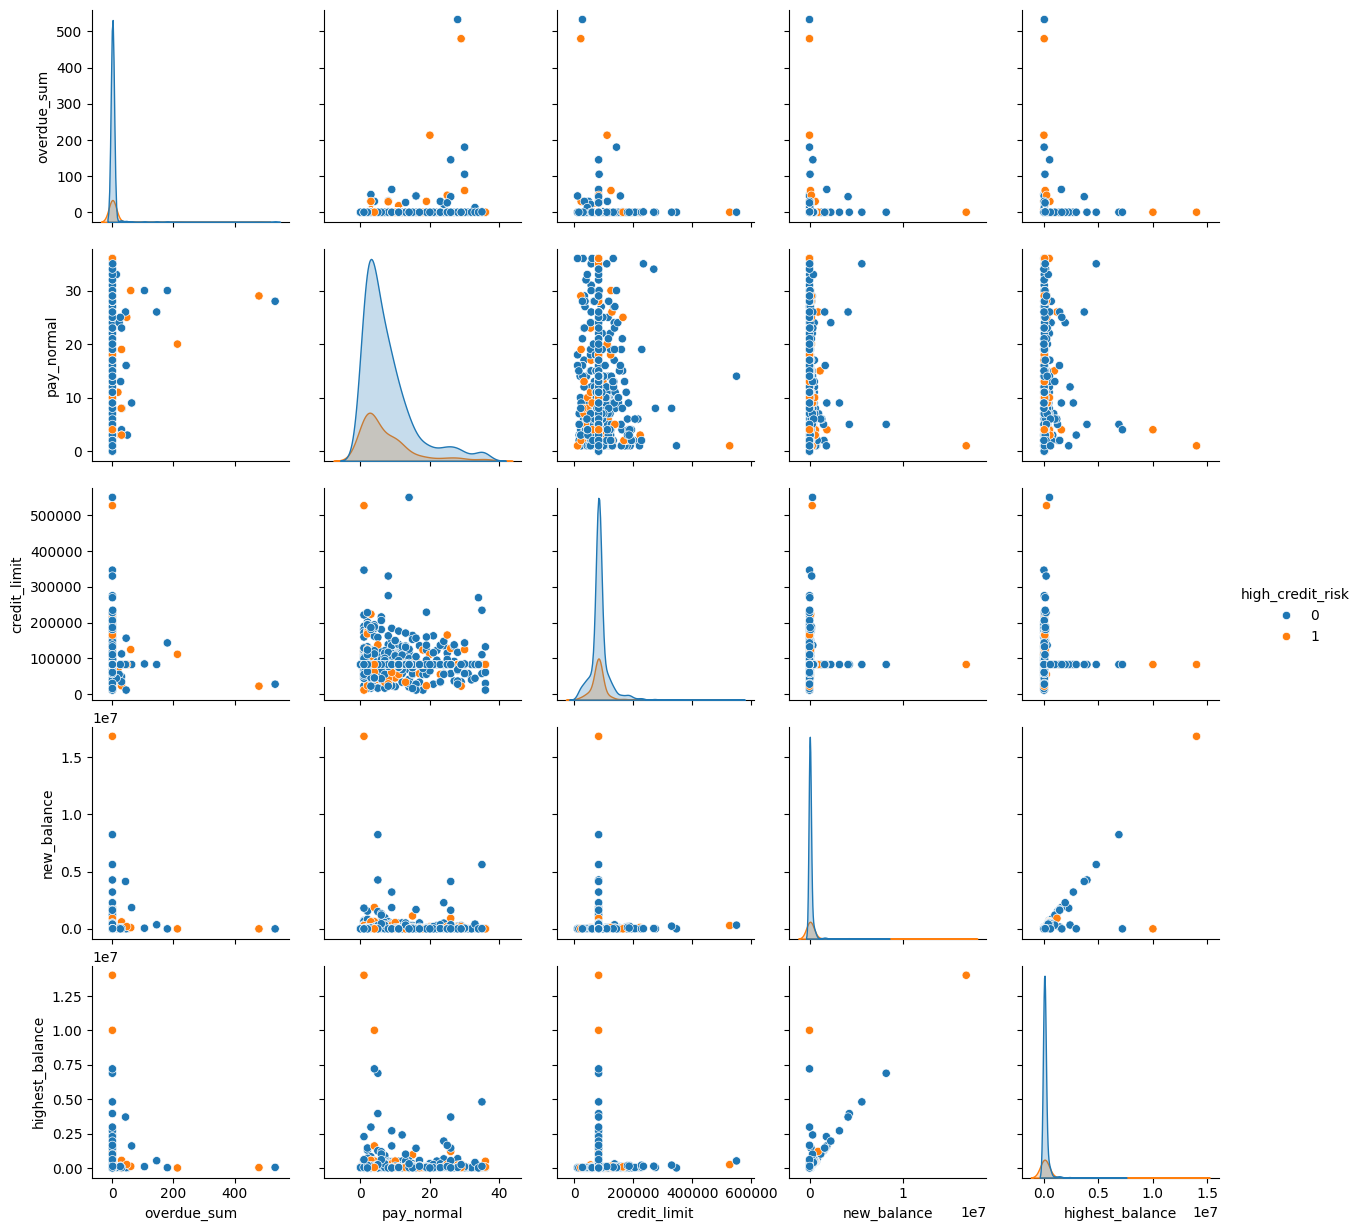

In [ ]:
# Visualização de dados:
sns.pairplot(data=clientes, hue='high_credit_risk')

In [ ]:
# Retirando outliers:
clientes = clientes.query('overdue_sum <=100')
clientes = clientes.query('highest_balance < 15000')
clientes = clientes.query('credit_limit < 180000')

# novo tamanho do dataset:
clientes.shape

(210, 6)

In [ ]:
# Verificando a proporção de observações em cada classe:
clientes.groupby('high_credit_risk')['high_credit_risk'].value_counts()

high_credit_risk
0    172
1     38
Name: count, dtype: int64

In [ ]:
# bibliotecas e função para re-amostragem (tratar desbalanceamento das classes):
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

def resample_data(df, target_column, method='undersample', random_state=35):
    """
    Resamples the DataFrame using the specified method.

    Parameters:
    - df: DataFrame containing the data
    - target_column: Column name of the target variable
    - method: Resampling method ('undersample' or 'oversample')
    - random_state: Seed for reproducibility

    Returns:
    - resampled DataFrame
    """
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    if method == 'undersample':
        sampler = RandomUnderSampler(random_state=random_state)
    elif method == 'oversample':
        sampler = RandomOverSampler(random_state=random_state)
    else:
        raise ValueError("Method must be 'undersample' or 'oversample'")

    X_res, y_res = sampler.fit_resample(X, y)
    print(f"New class distribution: {Counter(y_res)}")

    resampled_df = pd.DataFrame(X_res, columns=X.columns)
    resampled_df[target_column] = y_res.values

    return resampled_df

# Aplicando undersampling:
clientes = resample_data(clientes, target_column='high_credit_risk', method='undersample', random_state=35)
clientes

New class distribution: Counter({0: 38, 1: 38})


,overdue_sum,pay_normal,credit_limit,new_balance,highest_balance,high_credit_risk
0,0,2,94600.0,11041.2,11435.0,0
1,0,3,82500.0,0.0,1171.0,0
2,0,4,82500.0,4308.0,4808.0,0
3,0,4,82500.0,7200.0,12500.0,0
4,0,1,110000.0,4102.8,3918.0,0
...,...,...,...,...,...,...
71,0,5,80300.0,-2110.8,7966.0,1
72,0,9,82500.0,-1.2,9362.0,1
73,0,5,137500.0,0.0,9082.0,1
74,0,1,82500.0,0.0,5299.0,1


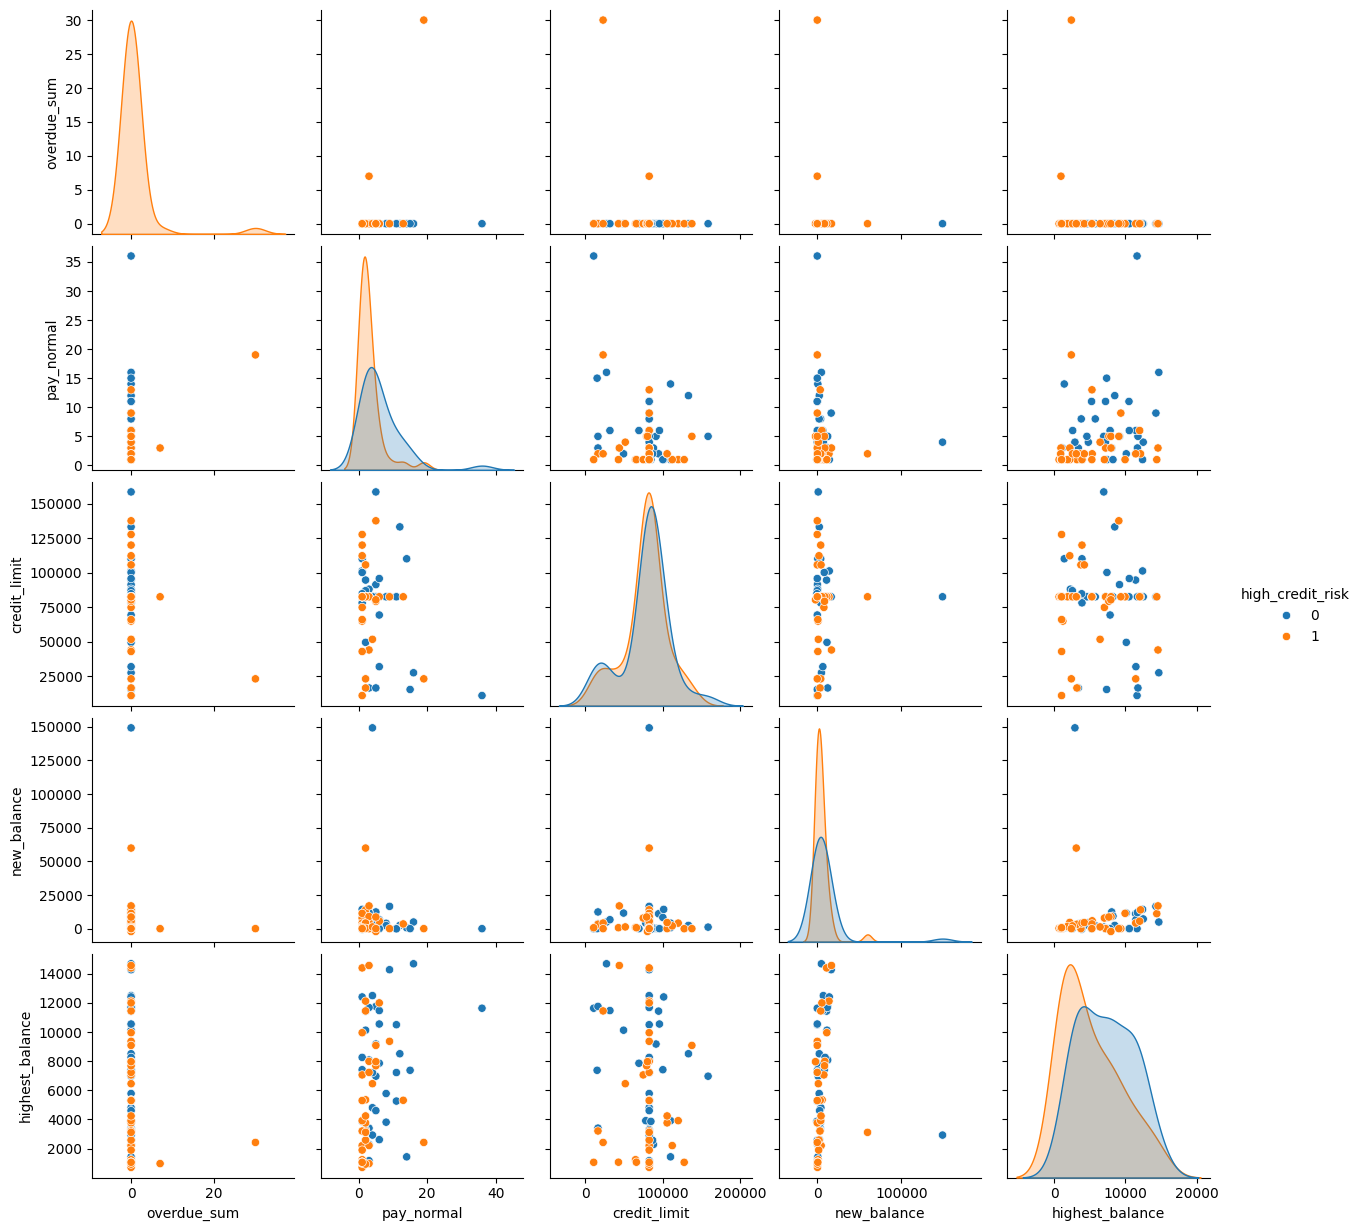

In [ ]:
# Visualizando os dados (pós-balanceamento):
sns.pairplot(data=clientes, hue='high_credit_risk')

In [ ]:
# Treino/teste:
X = clientes.drop('high_credit_risk', axis=1)
y = clientes[['high_credit_risk']]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57, 5)
(57, 1)
(19, 5)
(19, 1)


In [ ]:
X_train.head(2)

,overdue_sum,pay_normal,credit_limit,new_balance,highest_balance
22,0,8,82500.0,2256.0,5780.0
30,0,1,78100.0,4102.8,3918.0


## Modelagem

In [ ]:
# Normalizador:
scaler = StandardScaler()

# dados de treino:
X_train['overdue_sum'] = scaler.fit_transform(X_train[['overdue_sum']])
X_train['pay_normal'] = scaler.fit_transform(X_train[['pay_normal']])
X_train['credit_limit'] = scaler.fit_transform(X_train[['credit_limit']])
X_train['new_balance'] = scaler.fit_transform(X_train[['new_balance']])
X_train['highest_balance'] = scaler.fit_transform(X_train[['highest_balance']])

# dados de teste:
X_test['overdue_sum'] = scaler.fit_transform(X_test[['overdue_sum']])
X_test['pay_normal'] = scaler.fit_transform(X_test[['pay_normal']])
X_test['credit_limit'] = scaler.fit_transform(X_test[['credit_limit']])
X_test['new_balance'] = scaler.fit_transform(X_test[['new_balance']])
X_test['highest_balance'] = scaler.fit_transform(X_test[['highest_balance']])

In [ ]:
# Modelagem (Árvore de Decisão):
modelo_DT = DecisionTreeClassifier()
modelo_DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
# resumo do modelo:
modelo_DT.__dict__

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': None,
 'min_impurity_decrease': 0.0,
 'class_weight': None,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['overdue_sum', 'pay_normal', 'credit_limit', 'new_balance',
        'highest_balance'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'max_features_': 5,
 'tree_': <sklearn.tree._tree.Tree at 0x7c8c03e8eaa0>}

In [ ]:
# previsões:
predictions_test = modelo_DT.predict(X_test)
predictions_test

array([1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1])

In [ ]:
# valores reais da variável resposta (dados de teste):
y_test.values

array([[0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]])

In [ ]:
# Fazer previsões nos conjuntos de treino e teste
y_train_pred = modelo_DT.predict(X_train)
y_test_pred = modelo_DT.predict(X_test)

# Medir a acurácia nos conjuntos de treino e teste
train_accuracy = round(accuracy_score(y_train, y_train_pred), 1)
test_accuracy = round(accuracy_score(y_test, y_test_pred), 1)

print(f'Acurácia no conjunto de treino: {train_accuracy}')
print(f'Acurácia no conjunto de teste: {test_accuracy}')

Acurácia no conjunto de treino: 1.0
Acurácia no conjunto de teste: 0.5


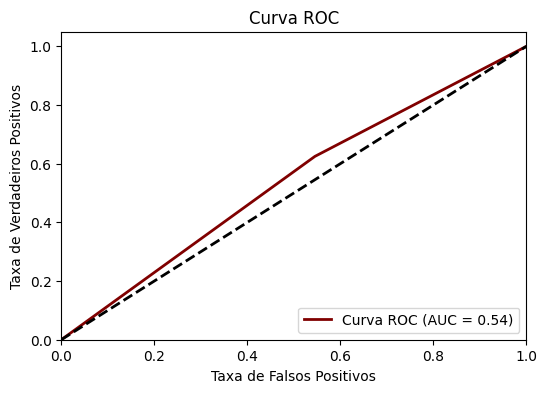

In [ ]:
# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
roc_auc = roc_auc_score(y_test, y_test_pred)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

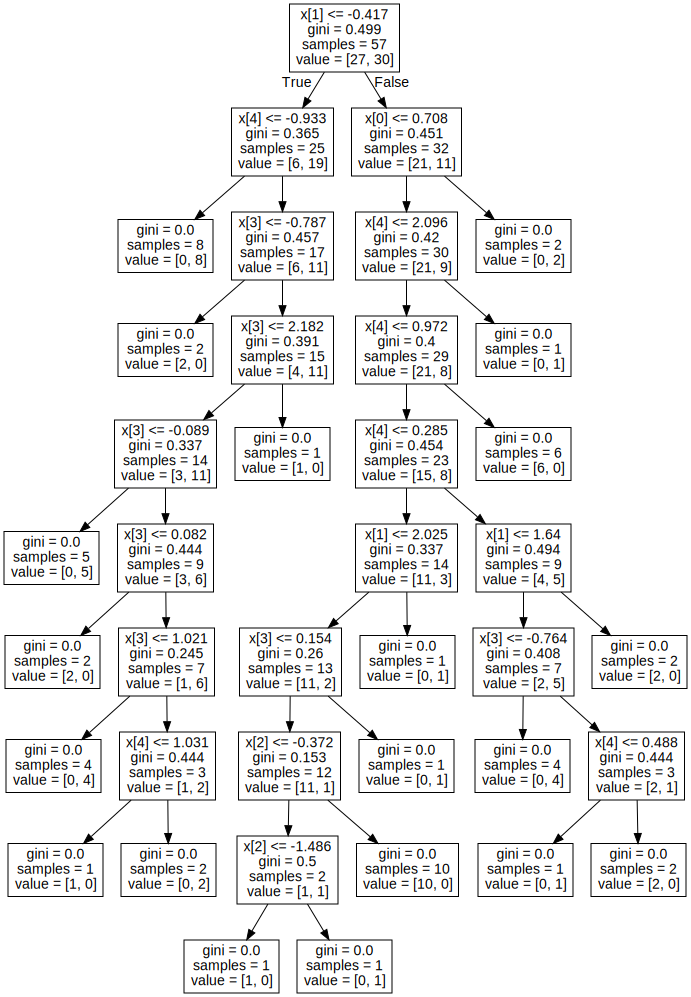

In [ ]:
# Visualizando a árvore:
import graphviz
from sklearn import tree

tree_data = tree.export_graphviz(modelo_DT, out_file=None)
graph = graphviz.Source(tree_data)
graph

In [ ]:
# modelagem com algoritmo Naive-Bayes:
from sklearn.naive_bayes import GaussianNB

model_NB = GaussianNB()
model_NB.fit(X_train, y_train)
model_NB.__dict__

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


{'priors': None,
 'var_smoothing': 1e-09,
 'classes_': array([0, 1]),
 'feature_names_in_': array(['overdue_sum', 'pay_normal', 'credit_limit', 'new_balance',
        'highest_balance'], dtype=object),
 'n_features_in_': 5,
 'epsilon_': 1.0000000000000003e-09,
 'theta_': array([[-0.16113784,  0.26364335,  0.05504016,  0.12684457,  0.24707925],
        [ 0.14502406, -0.23727901, -0.04953614, -0.11416011, -0.22237132]]),
 'var_': array([[1.00000000e-09, 8.65383814e-01, 1.03780316e+00, 1.12331774e+00,
         8.34221789e-01],
        [1.85559916e+00, 1.00229620e+00, 9.60796850e-01, 8.61500915e-01,
         1.04480805e+00]]),
 'class_count_': array([27., 30.]),
 'class_prior_': array([0.47368421, 0.52631579])}

In [ ]:
# Fazer previsões nos conjuntos de treino e teste
y_train_pred_NB = model_NB.predict(X_train)
y_test_pred_NB = model_NB.predict(X_test)

# Medir a acurácia nos conjuntos de treino e teste
train_accuracy_NB = round(accuracy_score(y_train, y_train_pred_NB), 1)
test_accuracy_NB = round(accuracy_score(y_test, y_test_pred_NB), 1)

print(f'Acurácia no conjunto de treino: {train_accuracy_NB}')
print(f'Acurácia no conjunto de teste: {test_accuracy_NB}')

Acurácia no conjunto de treino: 0.5
Acurácia no conjunto de teste: 0.4


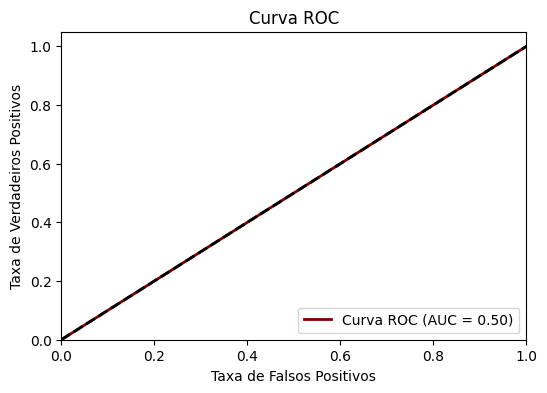

In [ ]:
# Calcular a curva ROC e a AUC
fpr_nb, tpr_nb, thresholds_bn = roc_curve(y_test, y_test_pred_NB)
roc_auc_nb = roc_auc_score(y_test, y_test_pred_NB)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr_nb, tpr_nb, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc_nb:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# Treino/teste:
X = clientes.drop('high_credit_risk', axis=1)
y = clientes[['high_credit_risk']]

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(57, 5)
(57, 1)
(19, 5)
(19, 1)


In [ ]:
# modelagem com algoritmo Random Forest (Floresta Aleatória):
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF = RF.fit(X_train, y_train)
RF.__dict__

<ipython-input-42-a3c883073e70>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RF = RF.fit(X_train, y_train)


{'estimator': DecisionTreeClassifier(),
 'n_estimators': 100,
 'estimator_params': ('criterion',
  'max_depth',
  'min_samples_split',
  'min_samples_leaf',
  'min_weight_fraction_leaf',
  'max_features',
  'max_leaf_nodes',
  'min_impurity_decrease',
  'random_state',
  'ccp_alpha'),
 'base_estimator': 'deprecated',
 'bootstrap': True,
 'oob_score': False,
 'n_jobs': None,
 'random_state': None,
 'verbose': 0,
 'warm_start': False,
 'class_weight': None,
 'max_samples': None,
 'criterion': 'gini',
 'max_depth': None,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'ccp_alpha': 0.0,
 'feature_names_in_': array(['overdue_sum', 'pay_normal', 'credit_limit', 'new_balance',
        'highest_balance'], dtype=object),
 'n_features_in_': 5,
 'n_outputs_': 1,
 'classes_': array([0, 1]),
 'n_classes_': 2,
 'estimator_': DecisionTreeClassifier(),
 'estimators_': [DecisionTreeClass

In [ ]:
# Fazer previsões nos conjuntos de treino e teste
y_train_pred_RF = RF.predict(X_train)
y_test_pred_RF = RF.predict(X_test)

# Medir a acurácia nos conjuntos de treino e teste
train_accuracy_RF = round(accuracy_score(y_train, y_train_pred_NB), 1)
test_accuracy_RF = round(accuracy_score(y_test, y_test_pred_NB), 1)

print(f'Acurácia no conjunto de treino: {train_accuracy_RF}')
print(f'Acurácia no conjunto de teste: {test_accuracy_RF}')

Acurácia no conjunto de treino: 0.5
Acurácia no conjunto de teste: 0.4


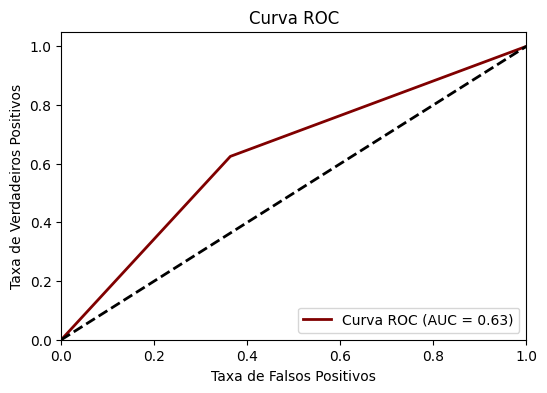

In [ ]:
# Calcular a curva ROC e a AUC
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_RF)
roc_auc = roc_auc_score(y_test, y_test_pred_RF)

# Plotar a curva ROC
fig, ax = plt.subplots(figsize=(6,4))
plt.plot(fpr, tpr, color='maroon', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()